## ⚕️ Breast Cancer Classification (With PCA)

Given *data about breast cancer in Wisconsin*, let's try to predict if a given tumor is **malignant**.

We will use a logistic regression model to make our predictions. We will use principal component analysis to reduce the dimension of the data and show that the same results can be achieved with a smaller number of features.

Data source: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

In [4]:
data = pd.read_csv('data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Preprocessing

In [6]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [7]:
data = data.drop(['id', 'Unnamed: 32'], axis=1)

In [8]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
y = data['diagnosis'].copy()
X = data.drop('diagnosis', axis=1).copy()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [11]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,0.2388,2.9040,1.936,16.970,0.008200,0.029820,0.057380,0.012670,0.01488,0.004738,12.48,37.16,82.28,474.2,0.12980,0.2517,0.36300,0.09653,0.2112,0.08732
295,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912,0.2191,0.6946,1.479,17.740,0.004348,0.008153,0.004272,0.006829,0.02154,0.001802,14.67,16.93,94.17,661.1,0.11700,0.1072,0.03732,0.05802,0.2823,0.06794
264,17.19,22.07,111.60,928.3,0.09726,0.08995,0.09061,0.06527,0.1867,0.05580,0.4203,0.7383,2.819,45.420,0.004493,0.012060,0.020480,0.009875,0.01144,0.001575,21.58,29.33,140.50,1436.0,0.15580,0.2567,0.38890,0.19840,0.3216,0.07570
125,13.85,17.21,88.44,588.7,0.08785,0.06136,0.01420,0.01141,0.1614,0.05890,0.2185,0.8561,1.495,17.910,0.004599,0.009169,0.009127,0.004814,0.01247,0.001708,15.49,23.58,100.30,725.9,0.11570,0.1350,0.08115,0.05104,0.2364,0.07182
280,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,0.06220,0.6361,1.0010,4.321,69.650,0.007392,0.024490,0.039880,0.012930,0.01435,0.003446,23.72,35.90,159.80,1724.0,0.17820,0.3841,0.57540,0.18720,0.3258,0.09720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,0.1620,0.06582,0.2315,0.5391,1.475,15.750,0.006153,0.013300,0.016930,0.006884,0.01651,0.002551,13.06,17.16,82.96,512.5,0.14310,0.1851,0.19220,0.08449,0.2772,0.08756
322,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,0.1543,0.06476,0.2212,1.0420,1.614,16.570,0.005910,0.020160,0.019020,0.010110,0.01202,0.003107,14.04,21.08,92.80,599.5,0.15470,0.2231,0.17910,0.11550,0.2382,0.08553
382,12.05,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.02978,0.1203,0.06659,0.1194,1.4340,1.778,9.549,0.005042,0.045600,0.043050,0.016670,0.02470,0.007358,12.57,28.71,87.36,488.4,0.08799,0.3214,0.29120,0.10920,0.2191,0.09349
365,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,0.1618,0.05557,0.5781,0.9168,4.218,72.440,0.006208,0.019060,0.023750,0.014610,0.01445,0.001906,24.31,26.37,161.20,1780.0,0.13270,0.2376,0.27020,0.17650,0.2609,0.06735


In [12]:
y_train

559    B
295    B
264    M
125    B
280    M
      ..
98     B
322    B
382    B
365    M
510    B
Name: diagnosis, Length: 398, dtype: object

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [14]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.754501,1.016591,-0.731287,-0.732655,-0.244628,-0.046204,0.276113,-0.209613,-1.463648,0.393141,-0.641618,3.004429,-0.501318,-0.547722,0.360450,0.205230,0.731104,0.073251,-0.716775,0.294136,-0.786560,1.835601,-0.748038,-0.715894,-0.048296,0.013325,0.464941,-0.272555,-1.224122,0.246375
1,-0.107318,-1.377551,-0.167357,-0.212302,-0.290236,-0.806690,-0.982285,-0.780715,-0.758709,-0.498156,-0.714886,-0.986138,-0.735399,-0.529945,-0.884480,-0.995274,-0.866965,-0.827887,0.092034,-0.729992,-0.330400,-1.399872,-0.391399,-0.384622,-0.624296,-0.968536,-1.127291,-0.871529,-0.081993,-0.899752
2,0.872048,0.598852,0.813064,0.791235,0.092006,-0.277838,0.018477,0.422567,0.191577,-0.947868,0.033417,-0.907208,-0.049035,0.109111,-0.837617,-0.778799,-0.379251,-0.357956,-1.134539,-0.809174,1.108900,0.583315,0.998261,0.988855,1.121705,0.047299,0.591565,1.311903,0.549310,-0.440828
3,-0.084408,-0.492662,-0.151531,-0.194880,-0.589225,-0.822895,-0.937614,-0.983264,-0.682686,-0.527956,-0.717118,-0.694440,-0.727204,-0.526020,-0.803359,-0.938981,-0.720874,-1.138757,-1.009453,-0.762781,-0.159600,-0.336308,-0.207531,-0.269767,-0.682796,-0.779638,-0.913008,-0.980094,-0.819317,-0.670290
4,1.436186,1.616250,1.421142,1.400153,0.435156,0.777386,1.288387,1.241373,0.312522,-0.080953,0.836020,-0.432725,0.720308,0.668516,0.099312,-0.090089,0.204513,0.113363,-0.781140,-0.156536,1.554646,1.634084,1.577161,1.499322,2.129706,0.912967,1.503354,1.137701,0.616777,0.830675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-0.728728,-1.474125,-0.738784,-0.706231,-0.445884,-0.558088,-0.590263,-0.406680,-0.661953,0.409395,-0.668768,-1.266998,-0.737448,-0.575889,-0.301121,-0.710094,-0.486074,-0.819401,-0.518823,-0.468728,-0.665750,-1.363087,-0.727641,-0.648009,0.550204,-0.439214,-0.370091,-0.459822,-0.163918,0.260568
394,-0.367909,-1.366321,-0.385599,-0.438505,1.260452,-0.308532,-0.639813,-0.393629,-0.928033,0.265813,-0.707076,-0.358672,-0.666251,-0.556957,-0.379656,-0.330002,-0.423184,-0.321701,-1.064102,-0.274786,-0.461624,-0.736144,-0.432492,-0.493805,1.072205,-0.181009,-0.434136,0.022499,-0.790402,0.140515
395,-0.599864,0.744836,-0.555111,-0.604019,-1.928521,0.052932,-0.121414,-0.503778,-2.102931,0.513696,-1.085690,0.349350,-0.582248,-0.719053,-0.660186,1.079553,0.299901,0.690362,0.475794,1.208037,-0.767814,0.484155,-0.595664,-0.690725,-1.929747,0.486928,0.113915,-0.075490,-1.097219,0.611267
396,1.802732,0.533720,1.737676,1.850235,-0.324985,0.163507,0.110821,0.750925,-0.668864,-0.979023,0.620306,-0.584805,0.667550,0.732929,-0.283346,-0.390950,-0.280854,0.372550,-0.768996,-0.693715,1.677538,0.109909,1.619153,1.598580,0.082204,-0.082483,0.011247,0.971276,-0.425756,-0.934645


In [15]:
X_train.mean()

radius_mean               -5.266586e-16
texture_mean              -5.802171e-17
perimeter_mean            -8.892942e-16
area_mean                 -2.510555e-16
smoothness_mean            1.974970e-16
compactness_mean          -2.845295e-16
concavity_mean             1.495175e-16
concave points_mean        1.372437e-16
symmetry_mean              1.026538e-16
fractal_dimension_mean     7.029553e-16
radius_se                  1.115802e-16
texture_se                 3.090772e-16
perimeter_se              -4.463208e-17
area_se                   -3.124246e-17
smoothness_se             -3.570567e-17
compactness_se            -4.128468e-17
concavity_se              -9.372737e-17
concave points_se          2.956875e-16
symmetry_se               -1.160434e-16
fractal_dimension_se      -2.198130e-16
radius_worst              -1.584439e-16
texture_worst             -1.428227e-16
perimeter_worst            3.749095e-16
area_worst                -5.579010e-17
smoothness_worst           5.383745e-16


In [16]:
X_train.var()

radius_mean                1.002519
texture_mean               1.002519
perimeter_mean             1.002519
area_mean                  1.002519
smoothness_mean            1.002519
compactness_mean           1.002519
concavity_mean             1.002519
concave points_mean        1.002519
symmetry_mean              1.002519
fractal_dimension_mean     1.002519
radius_se                  1.002519
texture_se                 1.002519
perimeter_se               1.002519
area_se                    1.002519
smoothness_se              1.002519
compactness_se             1.002519
concavity_se               1.002519
concave points_se          1.002519
symmetry_se                1.002519
fractal_dimension_se       1.002519
radius_worst               1.002519
texture_worst              1.002519
perimeter_worst            1.002519
area_worst                 1.002519
smoothness_worst           1.002519
compactness_worst          1.002519
concavity_worst            1.002519
concave points_worst       1

#### Principal Component Analysis (Dimensionality Reduction)

In [61]:
n_components = 8

pca = PCA(n_components=n_components)
pca.fit(X_train)

PCA(n_components=8)

In [62]:
pc_train = pd.DataFrame(pca.transform(X_train), columns=['PC' + str(i+1) for i in range(n_components)])
pc_test = pd.DataFrame(pca.transform(X_test), columns=['PC' + str(i+1) for i in range(n_components)])

In [63]:
pc_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.138139,1.229184,1.631555,3.263512,-1.163726,-1.288152,-0.389530,-1.280696
1,-3.333840,-1.343378,-0.733992,-1.809667,0.257351,0.477507,-0.058333,-0.259296
2,1.602162,-2.575821,-1.970162,0.465164,0.152097,-0.285799,-0.620303,0.349607
3,-3.182626,-1.846808,-0.599694,-0.385661,-0.412886,-0.190518,0.329236,-0.279413
4,4.970316,-1.499324,-1.518949,1.667847,0.128425,-1.048870,-0.237895,0.813936
...,...,...,...,...,...,...,...,...
393,-2.842090,0.437944,-1.617138,-1.482605,-0.293896,-0.504265,0.425620,0.348895
394,-1.835921,0.429510,-1.480282,-0.954551,-0.152735,-1.887241,-0.134162,-0.836815
395,-1.623848,0.990326,1.441233,1.324633,-3.334135,0.904648,0.493109,-0.337829
396,2.753048,-3.951003,0.040638,-0.522653,-0.304260,-0.623204,-0.630003,0.204626


In [64]:
pc_train.var()

PC1    13.229619
PC2     5.860269
PC3     2.793047
PC4     1.963390
PC5     1.650795
PC6     1.227090
PC7     0.684284
PC8     0.475490
dtype: float64

In [65]:
pca.explained_variance_ratio_

array([0.43987931, 0.19485149, 0.09286766, 0.06528189, 0.05488825,
       0.04080022, 0.02275215, 0.01580985])

/tmp/ipykernel_7006/2252966872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pca.explained_variance_ratio_, y=['PC' + str(i+1) for i in range(n_components)], orient='h', palette='husl')


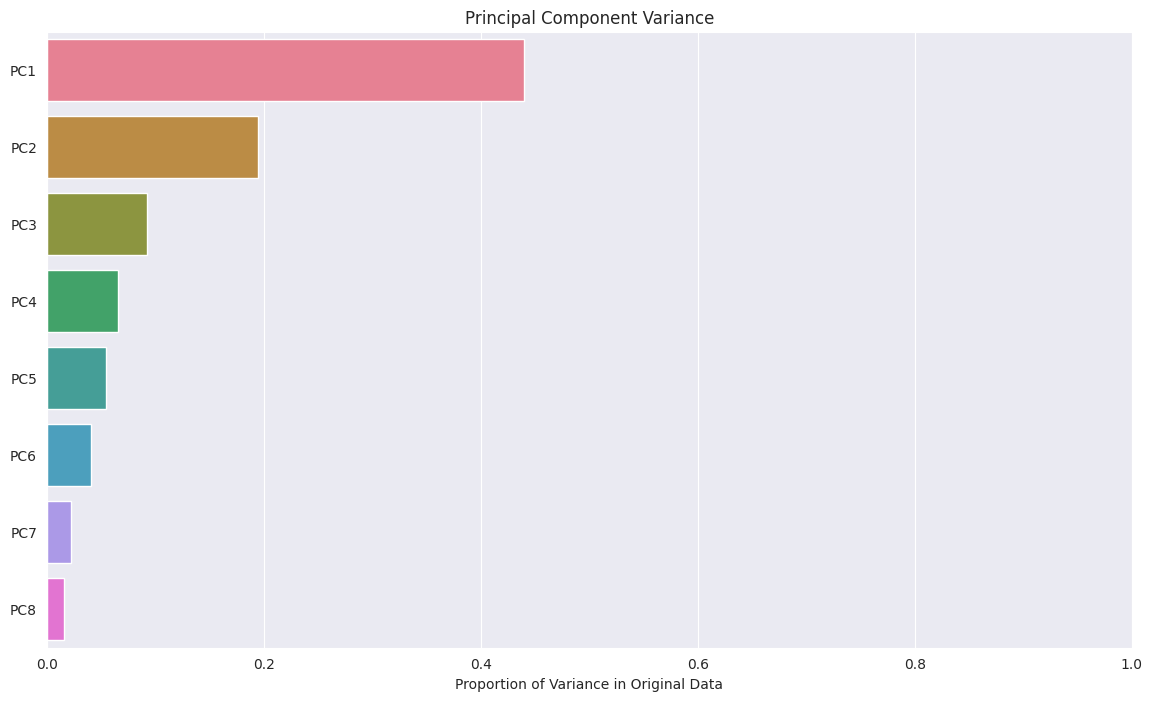

In [66]:
plt.figure(figsize=(14, 8))
sns.barplot(x=pca.explained_variance_ratio_, y=['PC' + str(i+1) for i in range(n_components)], orient='h', palette='husl')
plt.xlim(0., 1.)
plt.xlabel("Proportion of Variance in Original Data")
plt.title("Principal Component Variance")
plt.show()

### Training/Results

In [67]:
# On the original data
original_model = LogisticRegression()
original_model.fit(X_train, y_train)

print("Model Accuracy (Original Data): {:.5f}%".format(original_model.score(X_test, y_test)*100))

Model Accuracy (Original Data): 99.41520%


In [68]:
# On the Principal Components
pca_model = LogisticRegression()
pca_model.fit(pc_train, y_train)

print("Model Accuracy (PCA Data): {:.5f}%".format(pca_model.score(pc_test, y_test)*100))

Model Accuracy (PCA Data): 99.41520%
